# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import t
from scipy.stats import ttest_rel
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [4]:
medical.shape

(1338, 8)

In [5]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

In [7]:
#Mean of charges
charges_mean = medical['charges'].mean()
print(charges_mean)

13270.422265141257


In [8]:
#Standard deviation of charges 
charges_std = medical['charges'].std()
print(charges_std)

12110.011236693994


In [14]:
#Median of charges 
charges_median = medical['charges'].median()
print(charges_median)

9382.033


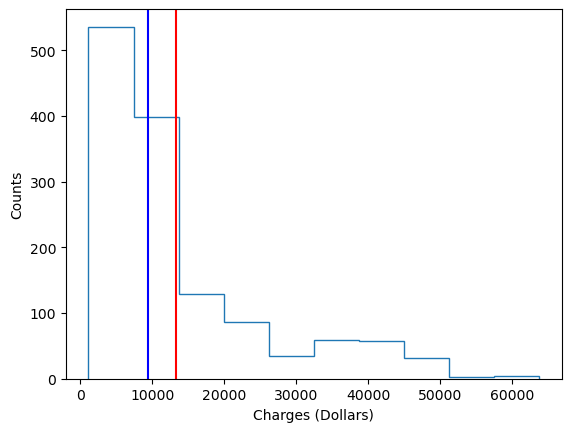

In [15]:
#Histogram of charges 
_ = plt.hist(medical['charges'],histtype='step')
_ = plt.xlabel('Charges (Dollars)')
_ = plt.ylabel('Counts')
_ = plt.axvline(charges_mean, color='r')
_ = plt.axvline(charges_median, color='b')
plt.show()

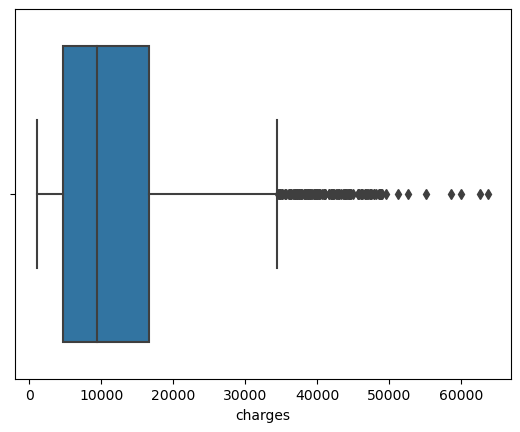

In [17]:
_ = sns.boxplot(x=medical['charges'])
plt.show()

The histogram shows a postive (right) skew, so the mean is influenced by the large charges in the tail
of the distribtion.  This is shown by the mean (red) of the charges being larger than the associated
median (blue).  In this case, the mean value alone is not an appropriate descriptor of the overall charges.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

The underlying question is how well does our sample of 1338 patients represent the overall population, particularly with respect to the average charge.   To determine whether the actual average charge has fallen below 12,000, we can perform repeated draws from our sample distribution (see above histogram) of size n and compute the mean of each.  This will give us the sampling distribution of the mean and the Central Limit Theorem (CLT) tells us that this distribution will approach a normal distribution as n increases.  From the sampling distribution of the mean, we can calculate the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned or not.  

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [20]:
#Define function for resampling from the sample distribution

def patient_sampler(n):
    return np.random.choice(medical['charges'], n)

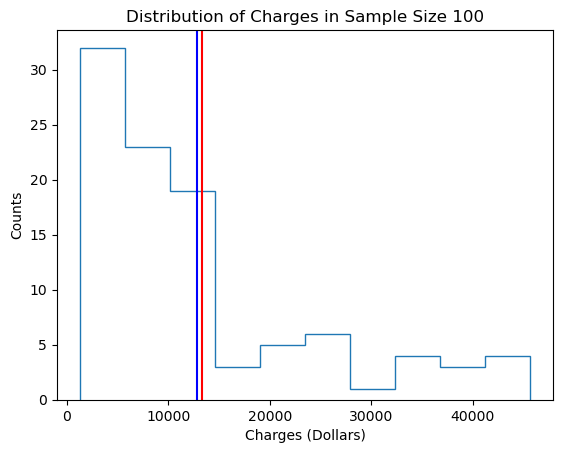

In [28]:
#Test "patient_sampler" function

seed(47)
patient_sample01 = patient_sampler(100)
patient_sample01_mean = np.mean(patient_sample01)

_ = plt.hist(patient_sample01,histtype='step')
_ = plt.xlabel('Charges (Dollars)')
_ = plt.ylabel('Counts')
_ = plt.title('Distribution of Charges in Sample Size 100')
_ = plt.axvline(charges_mean, color='r')
_ = plt.axvline(patient_sample01_mean, color='b')
plt.show()

In [37]:
#Calculate sampling distribution of the mean 

seed(47)
patient_sample02_mean = np.empty(1000)

for i in range(1000):
    patient_sample02_mean[i] = np.mean(patient_sampler(100))
    
patient_charge_sample_mean = np.mean(patient_sample02_mean)
patient_charge_sample_std = np.std(patient_sample02_mean)

13283.775887486629


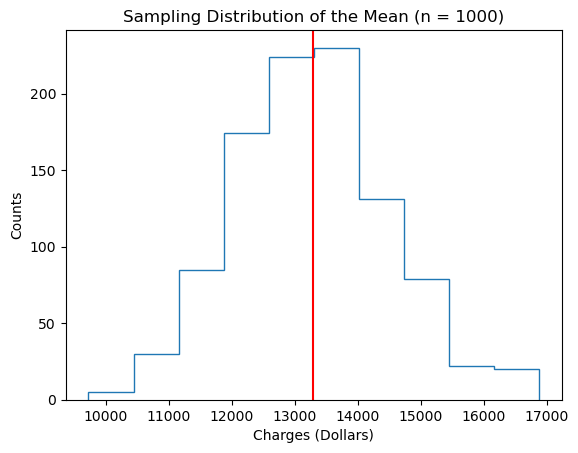

In [36]:
#Plot sampling distribution of the mean

print(patient_charge_sample_mean)

_ = plt.hist(patient_sample02_mean,histtype='step')
_ = plt.xlabel('Charges (Dollars)')
_ = plt.ylabel('Counts')
_ = plt.title('Sampling Distribution of the Mean (n = 1000)')
_ = plt.axvline(patient_charge_sample_mean, color='r')
plt.show()

In [41]:
#95% Confidence interval with t-value 
df = len(patient_sample02_mean)-1
t_score = round(t.ppf(1.0-.05/2,df),2)
print('t_score: ',t_score)

moe = round(t_score*patient_charge_sample_std/np.sqrt(1000),2)
moe_percent = round((moe/patient_charge_sample_mean)*100,2)
print('moe: ',moe)
print('moe percent: ',moe_percent)

interval_upper = patient_charge_sample_mean + moe
interval_lower = patient_charge_sample_mean - moe 
print('mean :',patient_charge_sample_mean)
print('95% confidence interval: ',interval_lower,interval_upper)

t_score:  1.96
moe:  75.98
moe percent:  0.57
mean : 13283.775887486629
95% confidence interval:  13207.795887486629 13359.755887486628


The results show that the 95% confidence interval shows that the actual mean charge is expected to be between approximately $13,208-$13,358 ninety-five percent of the time.  Thus, it is unlikely that the actual mean charge has fallen below $12,000.  

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

In [ ]:
We are assuming that the sample variances are good estimators of the population variances.

In [56]:
#Divide sample data in two groups based on status of insurance claim
insurance_no = medical[medical['insuranceclaim'] == 0]
insurance_yes = medical[medical['insuranceclaim'] == 1]

mean_charge_no = insurance_no['charges'].mean()
mean_charge_yes = insurance_yes['charges'].mean()
mean_charge_diff = mean_charge_yes - mean_charge_no

In [43]:
insurance_no.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
5,31,0,25.740,0,0,2,3756.62160,0
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0


In [44]:
insurance_yes.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.90,0,1,3,16884.9240,1
1,18,1,33.77,1,0,2,1725.5523,1
4,32,1,28.88,0,0,1,3866.8552,1
6,46,0,33.44,1,0,2,8240.5896,1
10,25,1,26.22,0,0,0,2721.3208,1


7602.506384231372


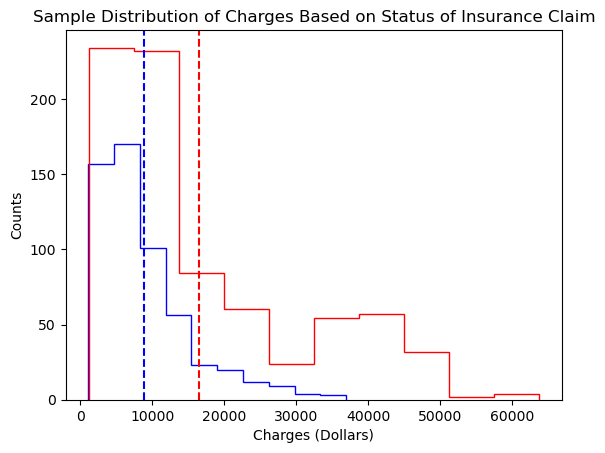

In [57]:
_ = plt.hist(insurance_no['charges'],histtype='step',color='b')
_ = plt.hist(insurance_yes['charges'],histtype='step',color='r')
_ = plt.xlabel('Charges (Dollars)')
_ = plt.ylabel('Counts')
_ = plt.title('Sample Distribution of Charges Based on Status of Insurance Claim')
_ = plt.axvline(mean_charge_no, color='b',linestyle='--')
_ = plt.axvline(mean_charge_yes, color='r',linestyle='--')

print(mean_charge_diff)

The sample data suggests that people with insurance are, on average, charged more than people without insurance.  The difference of the mean charges is approximately $7,600.  

Is this true of the population? 

Null Hypothesis: People with insurance are charged the same as people without insurance.  

Alternate Hypothesis: People with insurance are charged differently than people without insurance.   

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [58]:
#Hypothesis Testing

no_length = len(insurance_no['charges'])
yes_length = len(insurance_yes['charges'])

print(no_length, yes_length)

555 783


In [74]:
#calculate sampling distribuions of the means for with and without insurance 
def patient_sampler(data,n):
    return np.random.choice(data, n)

insurance_no_means = np.empty(10000)
insurance_yes_means = np.empty(10000)

insurance_no_data = insurance_no['charges'] 
insurance_yes_data = insurance_yes['charges']

seed(47)
for i in range(10000):
    insurance_no_means[i] = np.mean(patient_sampler(insurance_no_data,50))
    insurance_yes_means[i] = np.mean(patient_sampler(insurance_yes_data,50))
    

In [75]:
insurance_no_mean = np.mean(insurance_no_means)
insurance_no_var = np.var(insurance_no_means)

insurance_yes_mean = np.mean(insurance_yes_means)
insurance_yes_var = np.var(insurance_yes_means)

no insurance mean charge:  8818.26
yes insurance mean charge:  16448.98


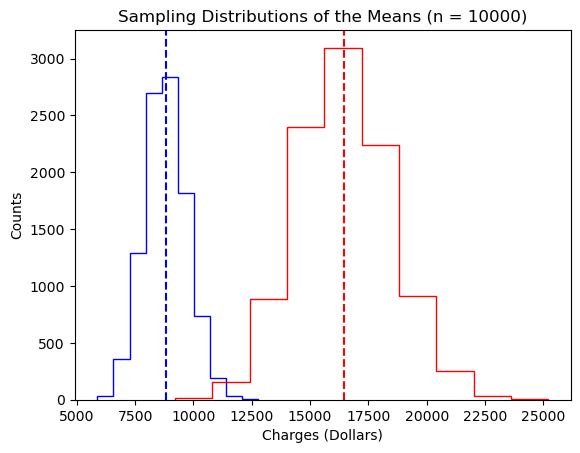

In [77]:
#plot sampling distributions of the means for with and without insurance
_ = plt.hist(insurance_no_means,histtype='step',color='b')
_ = plt.hist(insurance_yes_means,histtype='step',color='r')
_ = plt.xlabel('Charges (Dollars)')
_ = plt.ylabel('Counts')
_ = plt.title('Sampling Distributions of the Means (n = 10000)')
_ = plt.axvline(insurance_no_mean, color='b',linestyle='--')
_ = plt.axvline(insurance_yes_mean, color='r',linestyle='--')

print('no insurance mean charge: ',round(insurance_no_mean,2))
print('yes insurance mean charge: ',round(insurance_yes_mean,2))

In [98]:
#t-test (manually)
term1 = (10000-1)*insurance_no_var
term2 = (10000-1)*insurance_yes_var
pooled_std = np.sqrt((term1+term2)/(20000-2))

t_stat_man = (insurance_no_mean-insurance_yes_mean)/(pooled_std*np.sqrt(2*(1/10000)))

print('t_stat_man: ',t_stat_man)

#two-tailed test
prob_t_stat_man = t.cdf(t_stat_man,9999)*2*100
print('pvalue %: ',round(prob_t_stat_man,2))

t_stat_man:  -348.39962615843615
pvalue %:  0.0


In [84]:
#t-test (function)
t_stat_func = ttest_rel(insurance_no_means,insurance_yes_means)

print('t_stat_func: ',t_stat_func)

t_stat_func:  TtestResult(statistic=-351.29258658994866, pvalue=0.0, df=9999)


Conclusions:

Based on the t-test results (t-statisitc = -351 & pvalue = 0.0), we reject our null hypothesis and accept our alternative hypothesis that people with insurance are charged differently than people without insurance.  

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

I don't see an equivalent function for performing a z-test as we did above.  

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test